***
# &nbsp;
<font size="6" color="#00A0B2"  face="verdana"> <B>Titanic Survival Predictions</B></font>
***

I was a kid when when i watch the movie 'Titanic'. In my mind, I still keep a picture of all those people in the movies especially the clergies and the main actors and actress in the movies. Back then, Leonardo DiCaprio and Kate Winslet were just two young kids with nice haircuts and played a vital role in the movies.
According to engineers, a class to which I proudly belong, the Titanic was the unsinkable ship. It was beautiful, luxurious and fitted with the best of the technology. Titanic was the state-of-the-art cruiser. It just wasn't that unsinkable.

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This is a very unforgetable disaster that no one in the world can forget. It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision.

After 100 years, the Titanic still remains a discussion subject in the most diverse areas. For example, you can find books where the author take leadership lessons from the Titanic to apply in business; you can find interesting AI projects that apply deep learning to distinguish Titanic’s romantic scenes from disaster scenes; or you can find extensive exercises of creative thinking regarding what really happened with the Titanic.

The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.
The main aim of this kennel or project is to predict the servival of the titanic ship by walking through some analytical techniques, data visualisation, and many others procedures that need to be cafefully followed when analysing dataset. We gonna go through the following step-by-step
- Sumarrize data: by looking at the details on the dataframe performing descriptive statistics and data visualizations
- Prepare the Data: transforming the data in order to make it suitable for algorithms to process and work more efficiently in order to give more accurate and precise results. Here, i'm gonna do data cleaning, feature selection and feature engineering
- Evaluate Algorithms: Check the performance of the various regression/classification algorithms like KNN, SVM, logistic regression, randomforest classification, decision tree, Naive Bayes classifier,Perceptron, SGDClassifier,GaussianNB
- Improve Accuracy: After having the best performing algorithms, their parameters and the Hyperparameters are tuned to give maximum results. Therefore, we gonna perform Algorithm Tuning and Ensembles

# 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [4]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

from pylab import rcParams
# magic word for producing visualizations in notebook
%matplotlib inline
rcParams['figure.figsize'] = 16,10
sb.set_style('whitegrid')
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('C:/Users/NEONARD/Documents/python projects/kaggle/data/titanic/train.csv')
test = pd.read_csv('C:/Users/NEONARD/Documents/python projects/kaggle/data/titanic/test.csv')

#data=[train, test]

In [3]:
# Check the structure of the train data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print('# of passengers/records/rows in train_dataset: ' + str(len(train.index)) + '\n')
print('# of features/columns in train_dataset: ' + str(len(train.keys())) + '\n')
print("-----------------------------------------------------------------------------------------------------------------")
train.head()

# Total features in training dataset given = 12

# of passengers/records/rows in train_dataset: 891

# of features/columns in train_dataset: 12

-----------------------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Check the structure of the test data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print('# of passengers/records/rows in test_dataset: ' + str(len(test.index)) + '\n')
print('# of features/columns in test_dataset: ' + str(len(test.keys())) + '\n')
print("-----------------------------------------------------------------------------------------------")
test.head()

# Total features in test dataset given = 11, Survived has been dropped since it is the target variable

# of passengers/records/rows in test_dataset: 418

# of features/columns in test_dataset: 11

-----------------------------------------------------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1.1 Understanding the features 
- This is an important step which almost everyone skips.
Don’t directly jump to writing machine learning code. First understand the problem and what every feature means. See if you can find any relation with the features and the target variable.

In [6]:
print("train Shape : {}\ntest Shape : {}".format(train.shape,test.shape))

train Shape : (891, 12)
test Shape : (418, 11)


In [7]:
# data types for train dataset
train.dtypes

#•	Seven features are integer or floats. 
#•	Five features are strings (object).

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________


In [10]:
test.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
________________________________________


## 1.1.2 Features that are categorical
- These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization. As i already described or detail description of the dataset given, we can see that the categorical variables or features are: categorical: Sex, and Embarked.

In [11]:
#Which features are categorical?
cat = train.select_dtypes(include=['object']).copy()
cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


## 1.1.3 Features that are numerical
- Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization. Continous: Age, Fare. Discrete: SibSp, Parch, Survived, Pclass

In [12]:
#select numeric data
num = train.select_dtypes(include=['float', 'int64']).copy()
num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## 1.1.4 Features which are mixed data types
Numerical, alphanumeric data within same feature. These are data for correction.Looking at the preview of the data above, we can see that:
- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.


## 1.1.5 Features  containing errors or typos
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

***
# &nbsp;
<font size="5" color="#00A0B2"  face="verdana"> <B>1.2 Analyze by pivot/crosstab features / Visualization and Feature Relations </B></font>
***

In [150]:
# 1.  Sibling and spouse survival

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


passengers with 1 sibsp survived most compared to the other SibSp

In [151]:
# 2.  parent and children survival

train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch or parent/children of 3 had the highest survival rate compare to the other cases

In [15]:
#3.  Survived feature

Survived_df = pd.DataFrame(train['Survived'].value_counts().reset_index())
Survived_df

,index,Survived
0,0,549
1,1,342


 549 people died while 342 survived

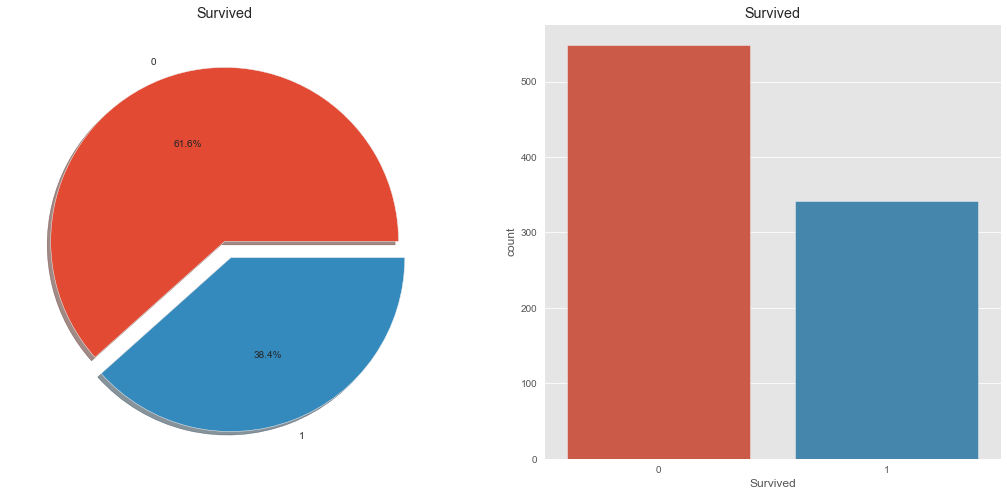

In [16]:
# 3.1  visualise survival

f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sb.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.
Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.


In [17]:
# 3.2  The nmuber of males or females

# show counts
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
# 3.3 survival by sex

pd.crosstab(train.Sex,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

# Analysing The Features
# Sex--> Categorical Feature
#train.groupby(['Sex','Survived'])['Survived'].count()

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [19]:
# 3.4 percentage survival by sex

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


 More females survived than males

Text(0.5, 1.0, 'Distribution of sex')

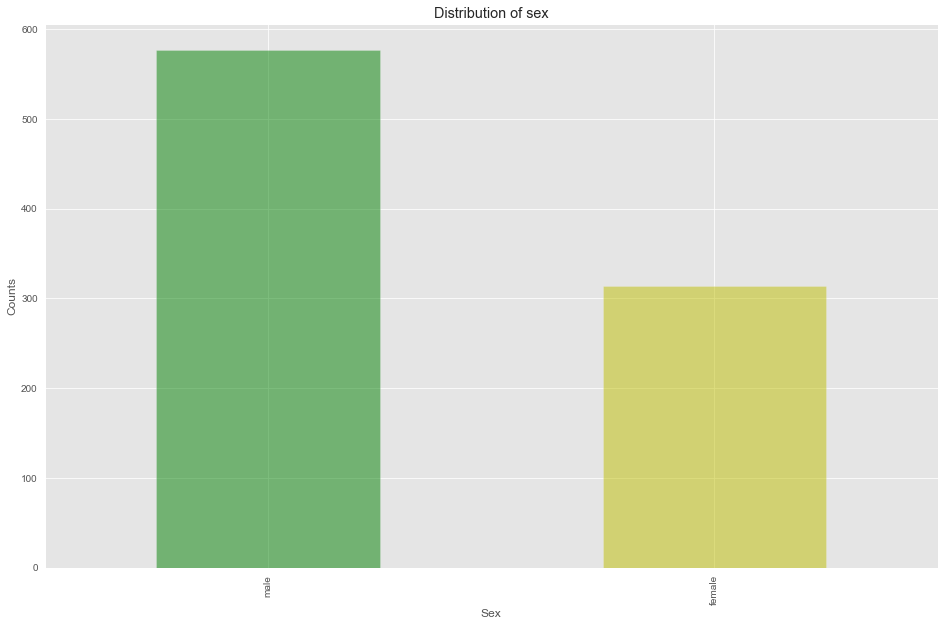

In [20]:
# 3.5  Distribution of sex

alpha_color = 0.5

# number of males and females
train['Sex'].value_counts().plot(kind='bar',
                             color=['g', 'y'],
                             alpha=alpha_color)
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Distribution of sex")

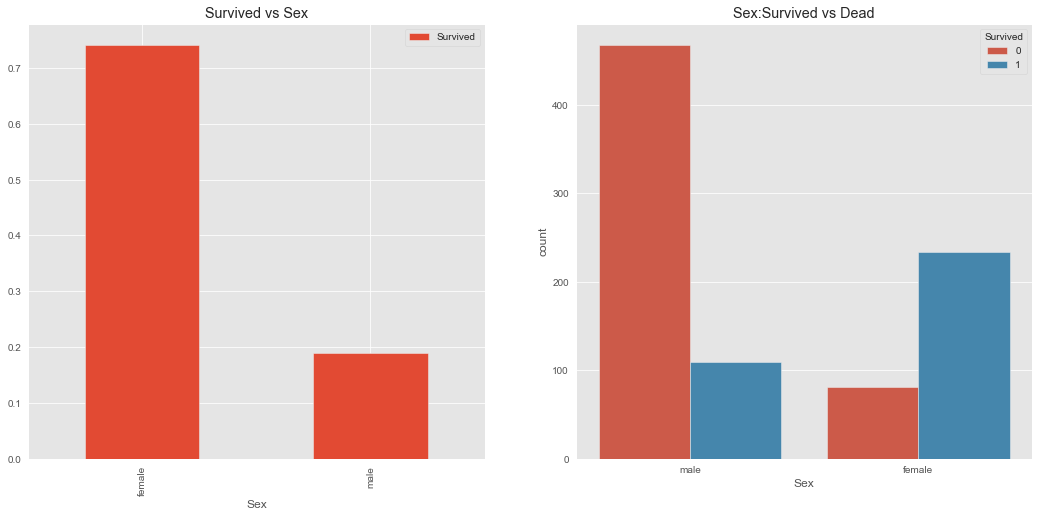

In [21]:
# 3.6  Sex- and survival / Gender and Survived

f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sb.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.


In [22]:
# 4  Pclass variable // Pclass and Survived


# # Show counts
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
# 4.1 passengers survival by class

pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


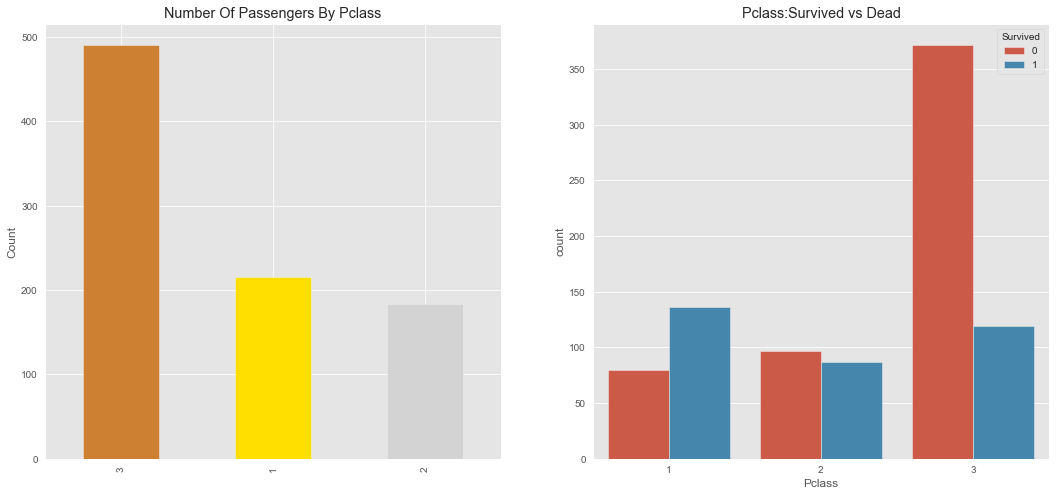

In [24]:
# 4.2 visualisation of passengers survival by class

f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sb.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- most of the passengers were in the third class and did not survive
- most first class passengers survived though they were few in numbers

In [25]:
# 4.3  survival rate with Sex and Pclass Together.

pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

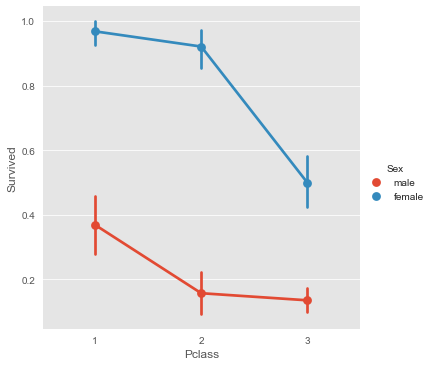

In [26]:
# 4.4 factor plot of Pclass, survival by sex

sb.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()

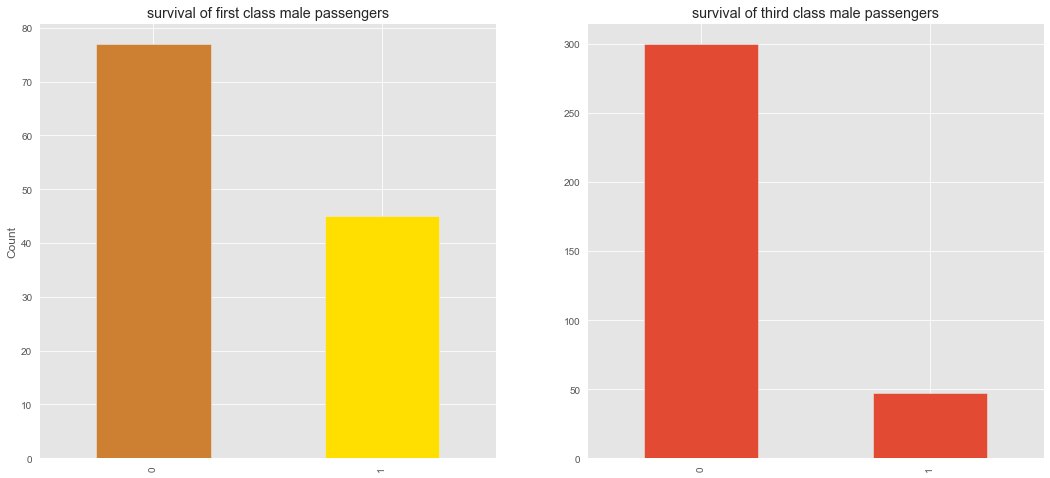

In [27]:
# 4.5 visualisation of survival of 1st and 3rd class

f,ax=plt.subplots(1,2,figsize=(18,8))
#train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
train[(train['Sex']=='male') & (train['Pclass']==1)]['Survived'].value_counts().plot(kind='bar',
                                                                                     color=['#CD7F32','#FFDF00'] ,ax=ax[0])
ax[0].set_title('survival of first class male passengers')
ax[0].set_ylabel('Count')
train[(train['Sex']=='male') & (train['Pclass']==3)]['Survived'].value_counts().plot(kind='bar')
ax[1].set_title('survival of third class male passengers')
plt.show()

In [28]:
#What is the distribution of survivors based on gender among the various classes?\

male_survivors = train[train['Sex'] =='male'].groupby('Pclass')['Survived'].agg(sum)
male_survivors

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [29]:
#Total Male Passengers in each class

male_total_passengers = train[train['Sex'] =='male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors /male_total_passengers
male_total_passengers

Pclass
1    122
2    108
3    347
Name: PassengerId, dtype: int64

In [30]:
# Female Passengers survived in each class

female_survivors = train[train['Sex'] =='female'].groupby('Pclass')['Survived'].agg(sum)
female_survivors

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

In [31]:
#Total Female Passengers in each class

female_total_passengers = train[train['Sex'] =='female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors /female_total_passengers
female_total_passengers

Pclass
1     94
2     76
3    144
Name: PassengerId, dtype: int64

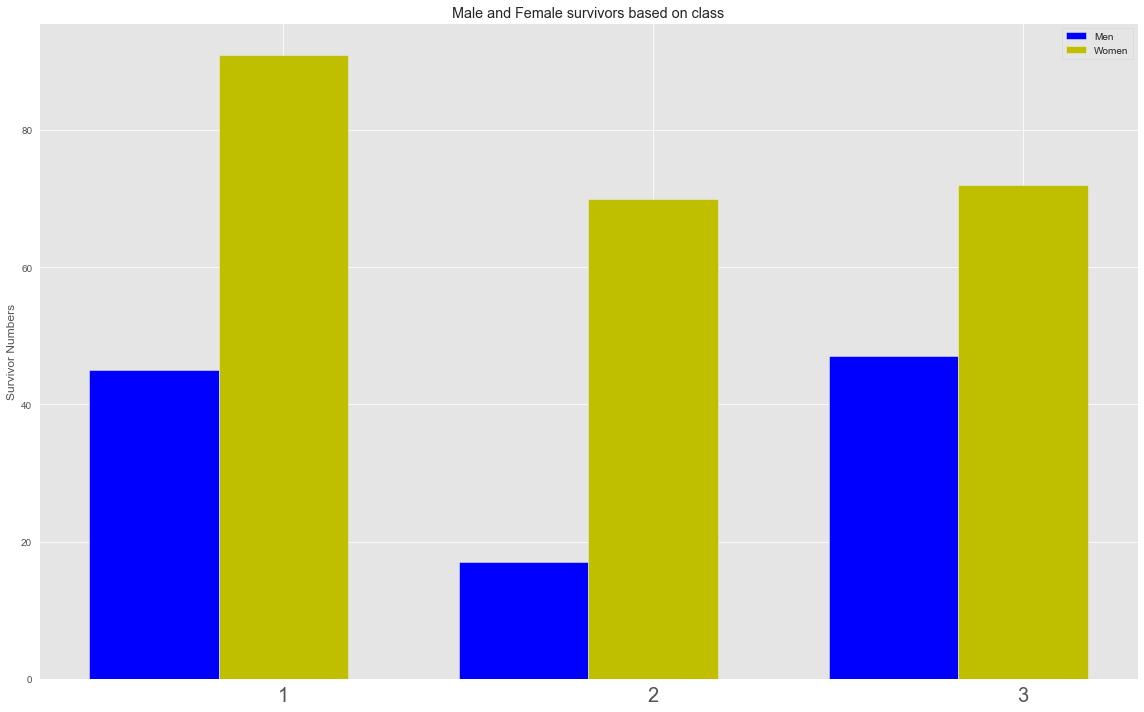

In [32]:
#Plotting the total passengers who survived basedon Gender

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

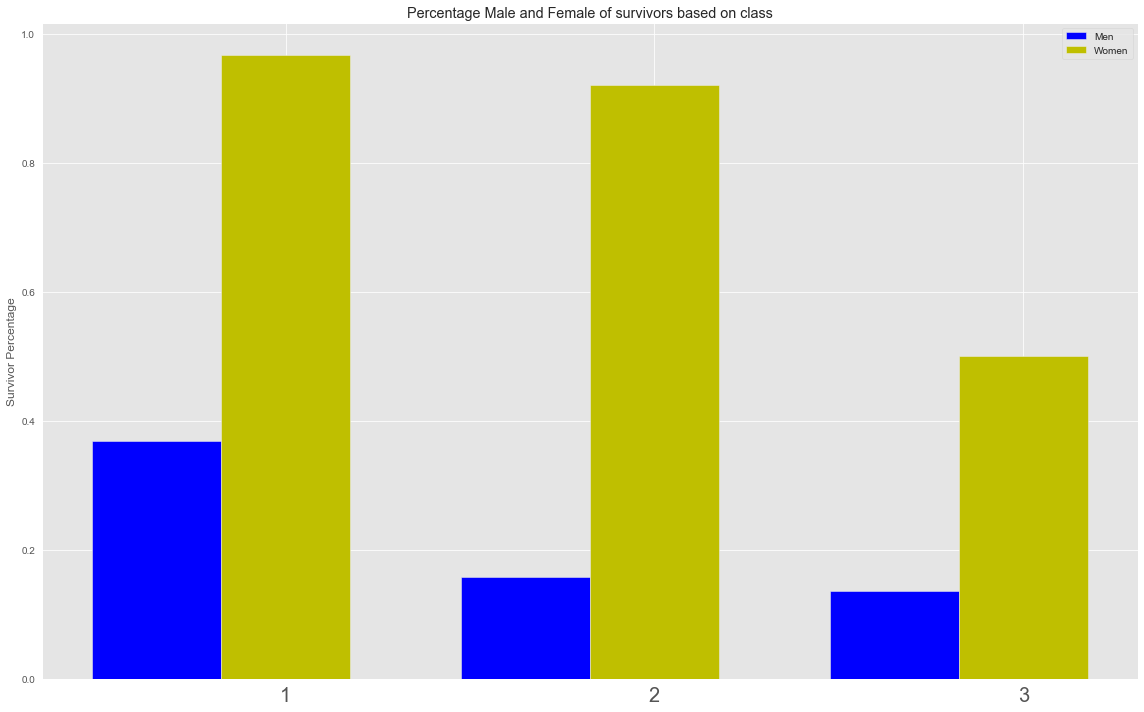

In [33]:
#Plotting the percentage of passengers who survived based on Gender

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y',label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

#### These are our observations:

- The majority of survivors are females in all the classes
- More than 90% of female passengers in first and second class survived
- The percentage of male passengers who survived in second and third class, respectively, are comparable

In [34]:
# 5 AGE FEATURE


print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [35]:
#What was the survival percentage among different age groups?
#Defining the age binning interval

age_bin = [0, 18, 25, 40, 60, 100]

In [36]:
# Creating the bins

train['AgeBin'] = pd.cut(train.Age, bins=age_bin)

In [37]:
 #Number of survivors based on Age bin
    
survivors = train.groupby('AgeBin')['Survived'].agg(sum)
survivors

AgeBin
(0, 18]       70
(18, 25]      54
(25, 40]     111
(40, 60]      50
(60, 100]      5
Name: Survived, dtype: int64

In [38]:
#Total passengers in each bin

total_passengers = train.groupby('AgeBin')['Survived'].agg('count')
total_passengers

AgeBin
(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 60]     128
(60, 100]     22
Name: Survived, dtype: int64

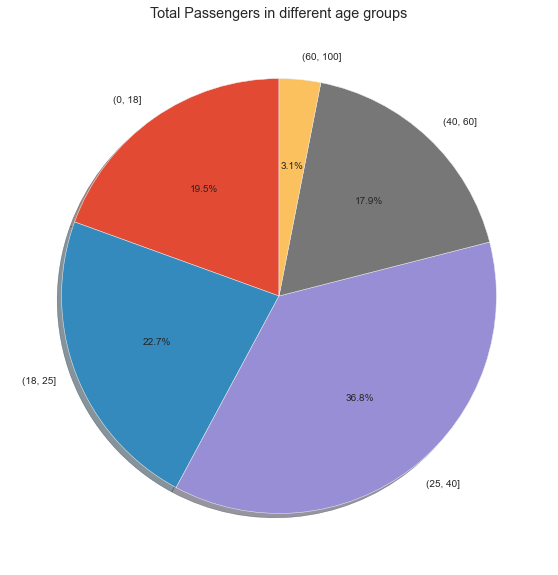

In [39]:
#Plotting the pie chart of total passengers in each bin

plt.pie(total_passengers,labels=total_passengers.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

In [40]:
train.drop(['AgeBin'], axis=1, inplace=True)

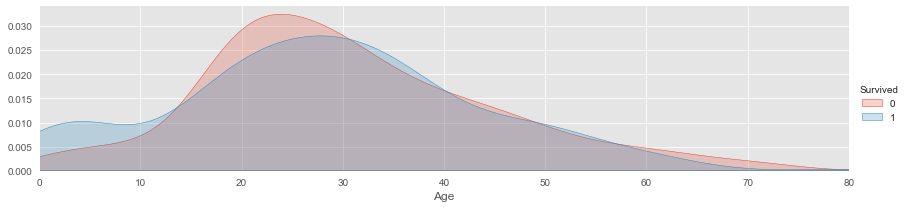

In [41]:
# facetgrid plot of survival by age

facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0.0, 20.0)

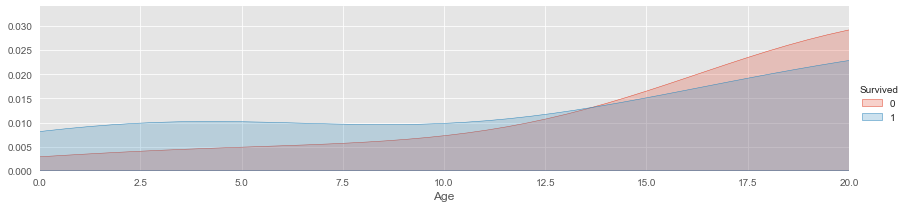

In [42]:
facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

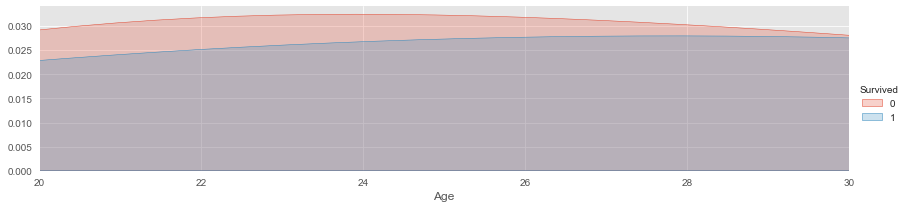

In [43]:
facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

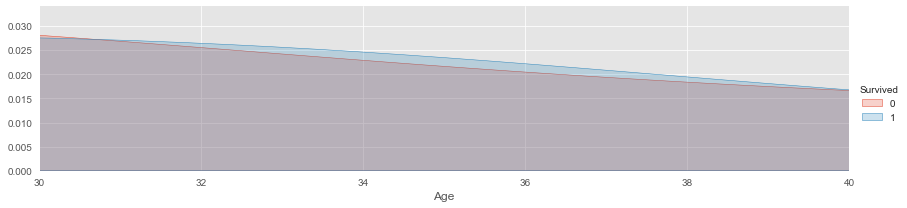

In [44]:
facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

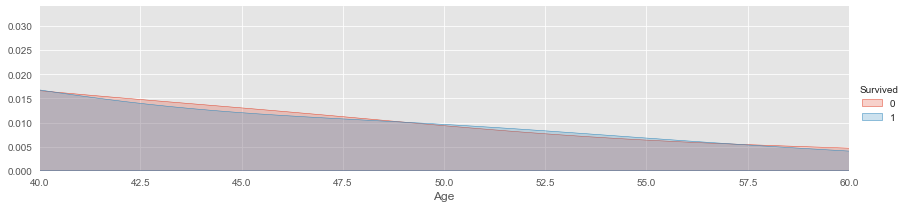

In [45]:
facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(40.0, 60.0)

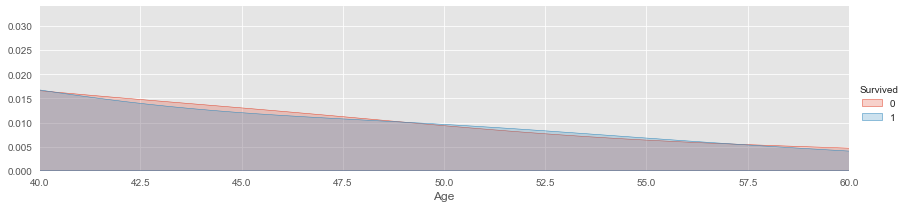

In [46]:
facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

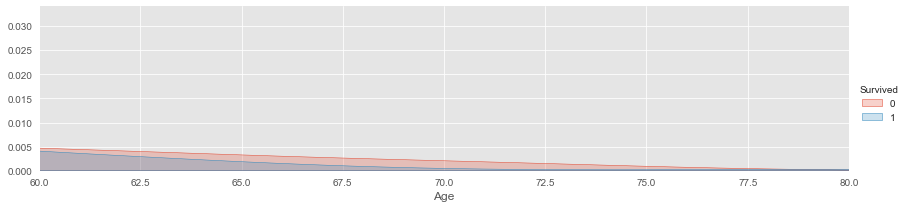

In [47]:
facet = sb.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

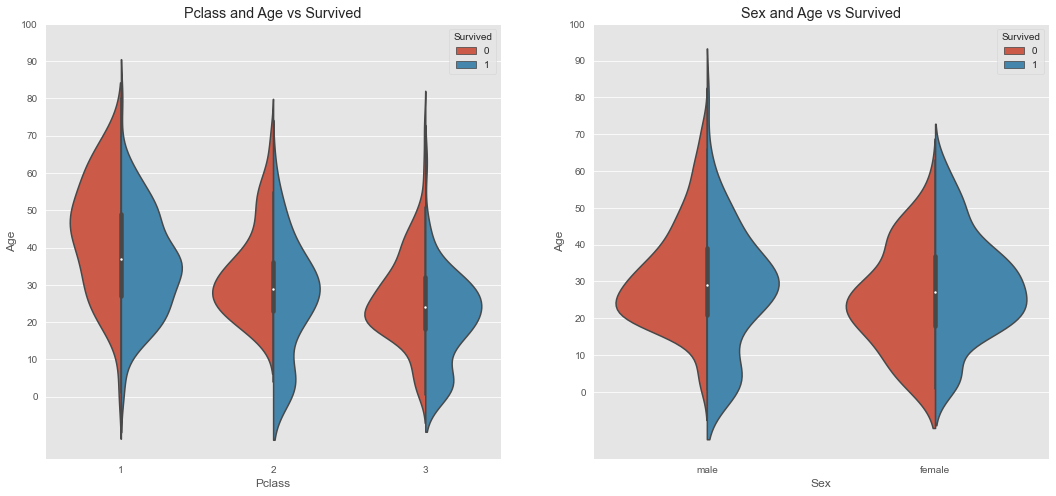

In [48]:
# 5.2  Survival of passengers based on Pclass and Age

f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observations:

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or 

In [49]:
# 6.0 Embarked variable

pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

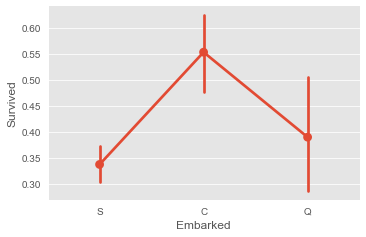

In [50]:
# 6.1  Chances for Survival by Port Of Embarkation

sb.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# The chances for survival for Port C is highest around 0.55 while it is lowest for S.

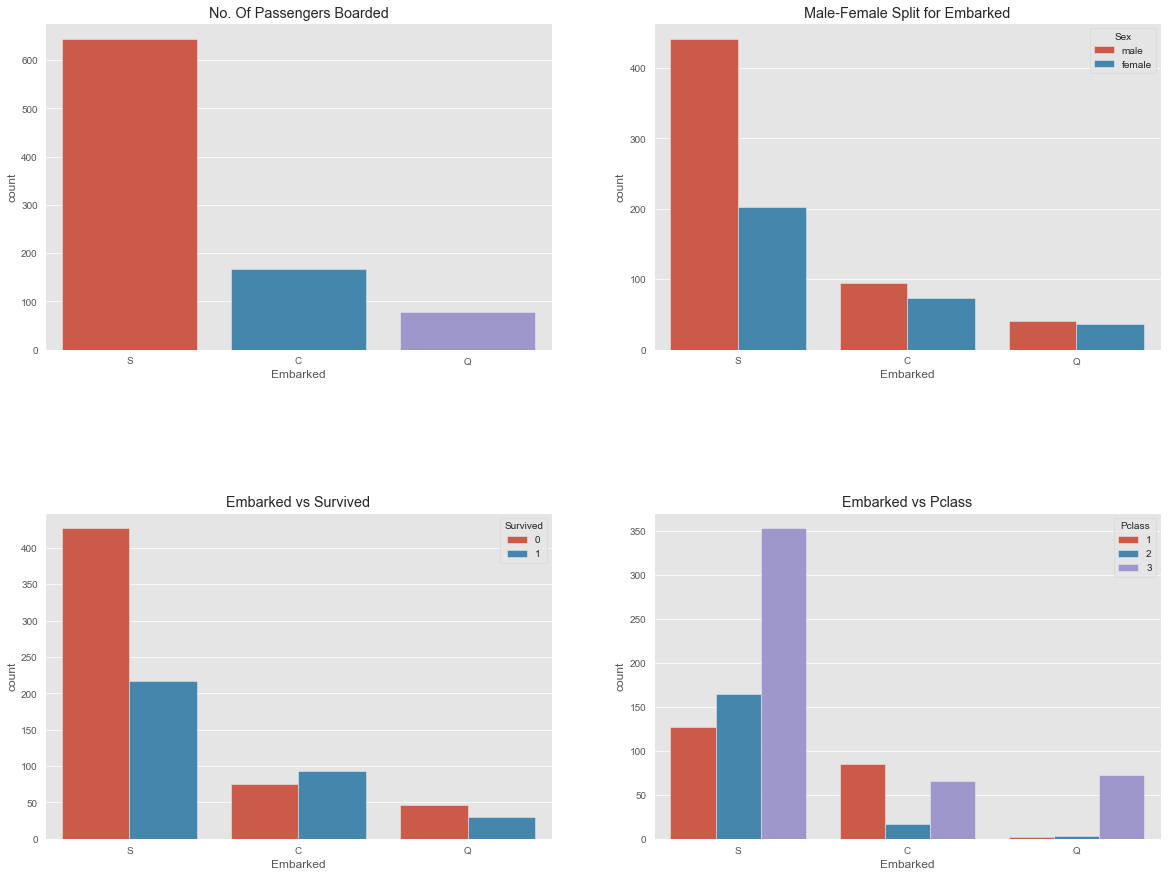

In [51]:
# 6.2 Embarked count, gender, Pclass, survival


f,ax=plt.subplots(2,2,figsize=(20,15))
sb.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sb.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sb.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sb.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

'''Observations:
- 1)Maximum passenegers boarded from S. Majority of them being from Pclass3.
- 2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
- 3)The Embark S looks to the port from where majority of the rich people boarded. 
- Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
- 4)Port Q had almost 95% of the passengers were from Pclass3.
'''

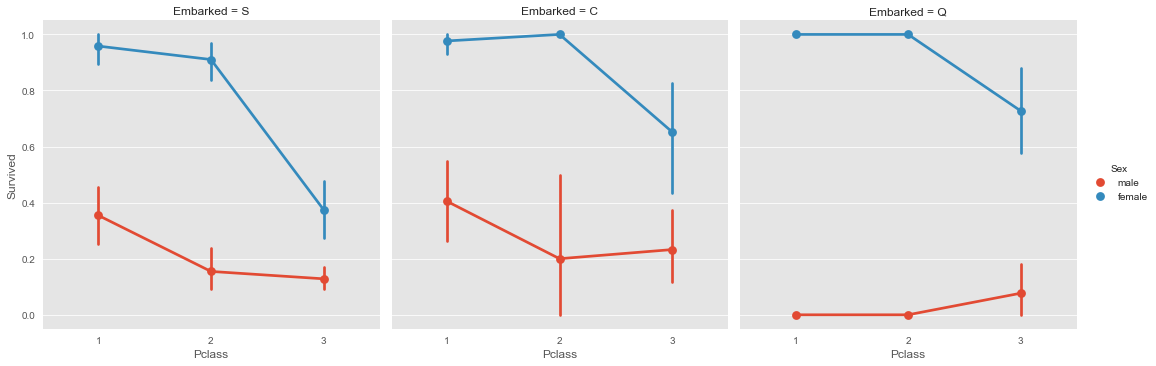

In [52]:

sb.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train)
plt.show()

In [53]:
# 7.0 SibSip

pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


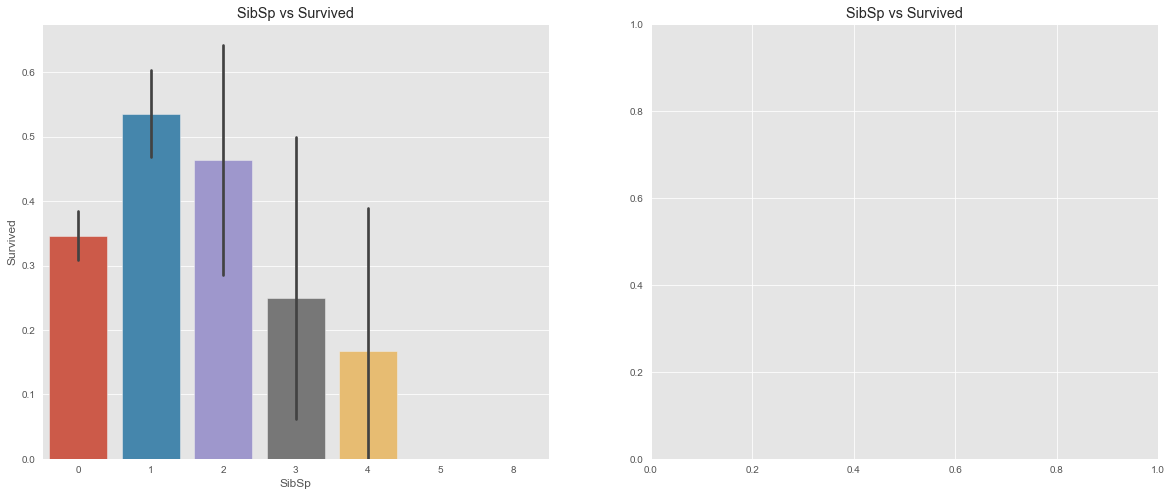

In [54]:
# 7.1 Survival Vs SibSp

f,ax=plt.subplots(1,2,figsize=(20,8))
sb.barplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sb.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [55]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [56]:
#  What is the distribution of nonsurvivors among the various classes who have family aboard the ship?

#Total number of nonsurvivors in each class
non_survivors = train[(train['SibSp'] > 0) | (train['Parch'] > 0) & (train['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

In [57]:
#Total passengers in each class

total_passengers = train.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors /total_passengers

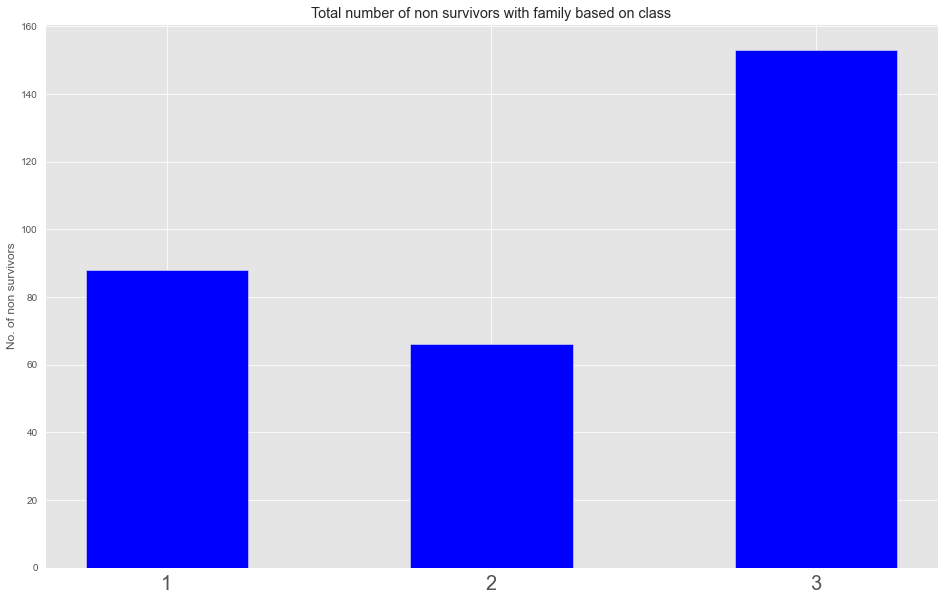

In [58]:
#Total number of non survivors with family based on class

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(),
non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

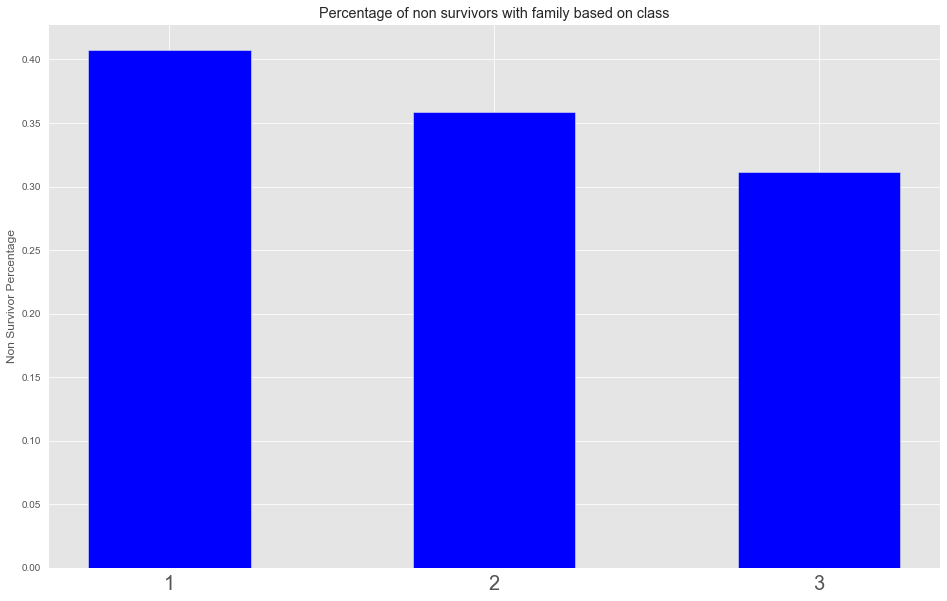

In [59]:
#Plot of percentage of non survivors with family based on class

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks =non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

#### These are our observations:

- There are lot of nonsurvivors in the third class
- Second class has the least number of nonsurvivors with relatives
- With respect to the total number of passengers, the first class, who had relatives aboard, has the maximum nonsurvivor percentage and the third class has the least

In [60]:
# 8.0 Fare / Fare and Survived


print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


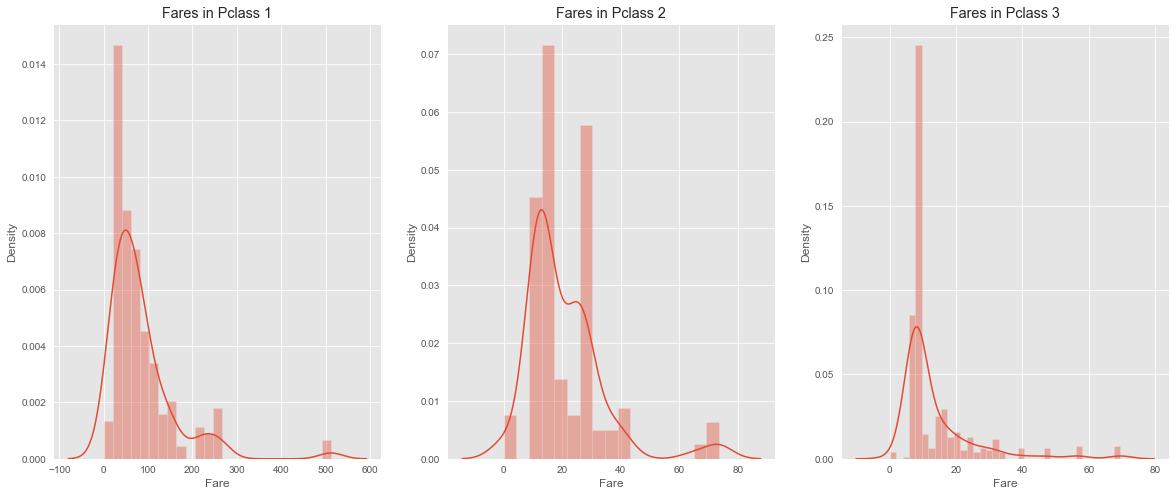

In [61]:
# 8.1 visualising Fare and Survived

f,ax=plt.subplots(1,3,figsize=(20,8))
sb.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sb.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sb.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

***
# &nbsp;
<font size="5" color="#00A0B2"  face="verdana"> <B># 2.0  Data analysis and engineer Features (Wrangling data)</B></font>
***
- We need to deal properly with these missing values, as discarding them will lead to loss of important information.

- Before we start imputing missing values and preprocessing them, we will combine the training and testing data. This will help in making the same changes to the whole dataset.

- we also gonna be doing some basic visualisation to get more inside about data pattern.


In [13]:
# Combining Datasets
ntrain = train.shape[0]
ntest = test.shape[0]
# target = train['Survived']
#target = train.Survived.values                 # this is the target variable that will be used for analysis

all_data = pd.concat((train, test)).reset_index(drop=True)
# all_data.drop(['Survived'], axis=1, inplace=True)  # these are the independent variable used to predict survival
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (891, 12)
Test data size is : (418, 11)
Combined dataset size is : (1309, 12)


In [14]:
# basic statistics on dataset (numerical features)
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
# # basic statistics on train dataset (categorical features)
all_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## 2. 1  Assess Missing Data

In [16]:
def bar_plot_missing_val(dataset,title=None,x_label=None, y_label=None,kind = 'bar', x_size = 16,y_size = 9):
    '''Plot a bar chart of missing values in a dataframe'''
    a = all_data.isnull().sum()/len(all_data)
    a.plot(title=title,x =x_label, y=y_label,kind=kind, figsize=(x_size,y_size))

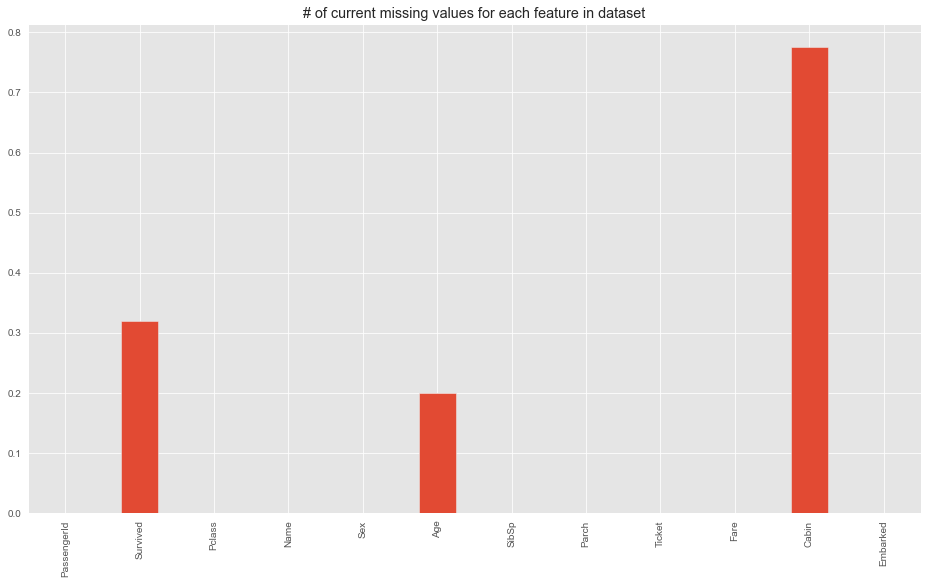

In [17]:
# Check how much missing data are currently in each column of the train dataset
bar_plot_missing_val(all_data,'# of current missing values for each feature in dataset', 'Features','# Missing values')

<AxesSubplot:>

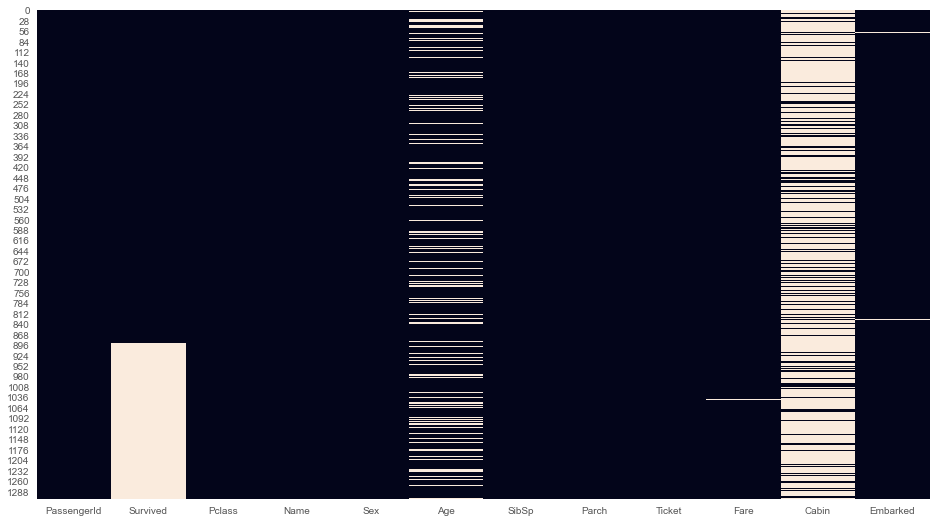

In [18]:
# Investigate patterns in the amount of missing data in each column.
plt.subplots(figsize=(16,9))
sb.heatmap(all_data.isnull(), cbar=False)

In [19]:
# Create table for missing data analysis
def draw_missing_data_table(dataset):
    total = all_data.isnull().sum().sort_values(ascending=False)
    percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


draw_missing_data_table(all_data)

,Total,Percent
Cabin,1014,0.774637
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


We can see from the analysis above that in this dataset, there exist some patterns in missing values. Looking at the heatmap and bar plot above I will sight out some of the similar patterns:
-  We see that Cabin variable has about 77% missing values. So, it can dropped or carefully transformed.
-  The feature Age has about 20% missing values. Since Age is an important variable in predicting survival,we gonna perform some data analysis on the feature to impute these missing values.
-  Fare and Embaarked have relatively low % of missing value. 

## 2.2 Handling missing data

In [20]:
# Remove the outlier columns from the dataset.
all_data_out = all_data.isnull().sum() / len(all_data)
outlier = all_data_out[all_data_out > 0.30].index # remove outliers with missing values more than 30%
# Print all the outliers columns to be removed.  
pd.DataFrame(outlier, columns=("Outlier columns",))

,Outlier columns
0,Survived
1,Cabin


In [21]:
# Drop Cabin from the dataframe since it has many missing values

all_data.drop(["Cabin"], axis=1, inplace=True)

In [22]:
all_data.isnull().sum()

# Age 354 missing values, Embarked 4 misssing values. so, we gona handle them carefully

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

<AxesSubplot:>

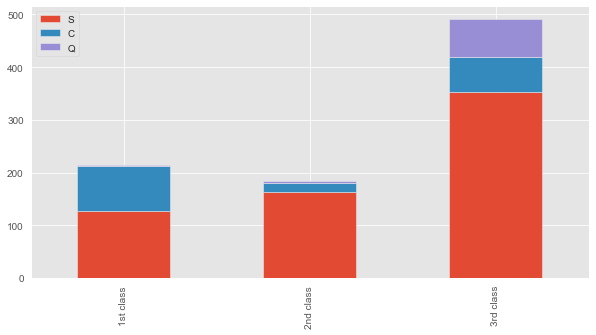

In [23]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [24]:
# check missing values in Embarked

all_data[all_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [25]:
# count values in Embarked
all_data["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
#mapping missing values in Embarked with the most frequent value S
all_data.fillna({"Embarked": 'S'},inplace=True)

In [27]:
print("Missing Count After Imputation of Embarked:",all_data['Embarked'].isnull().sum())

Missing Count After Imputation of Embarked: 0


In [28]:
# check all_data for missing values/ only age is left with misssing values
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [29]:
# fill missing values with mean

# fill missing values with mean

all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)

In [30]:
print("Missing Count After Imputation of Age:",all_data['Age'].isnull().sum())

Missing Count After Imputation of Age: 0


In [31]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [32]:
all_data[all_data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [33]:
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace=True)

In [34]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### 2.3 Family size
- since SibSp and Parch concerns members of a particular family, we can combine both features

In [35]:
# family size Parch + SibSp
all_data['FamilySize'] = all_data.SibSp + all_data.Parch

In [36]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [37]:
# drop Parch and SibSp since they are redundant information
all_data = all_data.drop(['Parch', 'SibSp'], axis=1)

In [38]:
display(all_data.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [39]:
# removing irrelevant features
all_data.drop(columns=['Name','Ticket'],axis=1,inplace=True)

### 2.4 Encode categorical features

In [40]:

#Encoding Embarked column S:0 , C:1, Q:2
Embarked_mapping = {'S': 0,'C': 1,'Q': 2}
all_data['Embarked'] = all_data['Embarked'].map(Embarked_mapping)

In [41]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0.0,3,male,22.0,7.2500,0,1
1,2,1.0,1,female,38.0,71.2833,1,1
2,3,1.0,3,female,26.0,7.9250,0,0
3,4,1.0,1,female,35.0,53.1000,0,1
4,5,0.0,3,male,35.0,8.0500,0,0


In [42]:
# encoding sex category feature male:1 and female:0
sex_mapping = {'male': 1,'female': 0}
all_data['Sex'] = all_data['Sex'].map(sex_mapping)

In [43]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0.0,3,1,22.0,7.2500,0,1
1,2,1.0,1,0,38.0,71.2833,1,1
2,3,1.0,3,0,26.0,7.9250,0,0
3,4,1.0,1,0,35.0,53.1000,0,1
4,5,0.0,3,1,35.0,8.0500,0,0


Text(0.5, 1.0, 'Correlation between features')

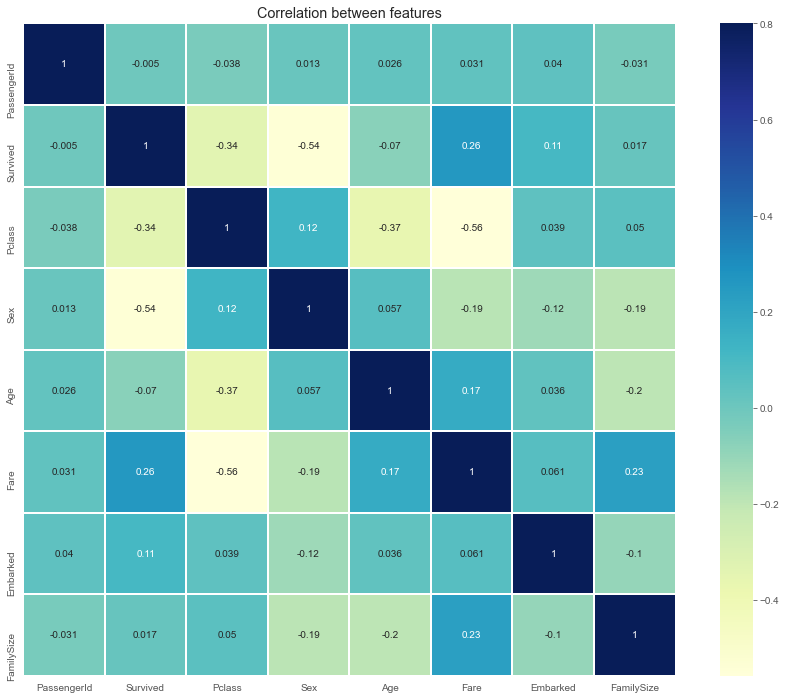

In [44]:
# correlation between variables
corr= all_data.corr()#["Survived"]
plt.figure(figsize=(16, 12))

sb.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

In [45]:
#correlation with the variable of interest
df_corr = all_data.corr()['Survived']
df_corr

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.070323
Fare           0.257307
Embarked       0.106811
FamilySize     0.016639
Name: Survived, dtype: float64

## 3. 0 Machine learning

In [49]:
all_data.Survived[all_data.Survived.isnull()==False]

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [50]:
# importing the necessary librairies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


from sklearn import model_selection
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score

In [51]:
all_data = all_data.copy()

In [52]:
# Save the 'Id' column
train_ID = train['PassengerId']
test_ID = test['PassengerId']

In [141]:
train_len = len(train)

In [142]:
train_len

891

In [51]:
train = all_data[:train_len]
test = all_data[train_len:]

In [52]:
train.shape

(891, 8)

In [53]:
test.shape

(418, 8)

In [54]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0.0,3,1,22.0,7.2500,0,1
1,2,1.0,1,0,38.0,71.2833,1,1
2,3,1.0,3,0,26.0,7.9250,0,0
3,4,1.0,1,0,35.0,53.1000,0,1
4,5,0.0,3,1,35.0,8.0500,0,0


In [99]:
## Separate train features and label 

#train["Survived"] = train["Survived"].astype(int)

In [129]:
#X_train = train.drop("Survived", axis=1)  #predictors
#Y_train = train["Survived"]       #target
#X_test  = test.drop("PassengerId", axis=1).copy()
#X_train.shape, Y_train.shape, X_test.shape'''

In [114]:
#predictors = train.drop('Survived', axis=1)
#target = train["Survived"]  #target
#X_test  = test.drop("Survived", axis=1).copy()
#X_test.isnull().sum()
#predictors = train.drop(labels=["Survived"],axis = 1,inplace=True) # predictors

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(all_data[all_data.Survived.isnull()==False].drop('Survived',axis=1),
                                                all_data.Survived[all_data.Survived.isnull()==False],test_size=0.30, random_state=2019)

In [58]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(623, 7) (268, 7)
(623,) (268,)


### 3. 1  standardizing the data


In [131]:
## We will be using standardscaler to transform the data.
std = StandardScaler()

In [132]:
test = std.fit_transform(test)
#Y_train = std.fit_transform(Y_train)
#Y_test  = std.fit_transform(Y_test)
#X_test  = std.fit_transform(X_test)

## 3.1 Machine learning techniques

In [59]:
####  Logistic Regression

logreg = LogisticRegression() # instantiate the model

In [60]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [64]:
y_pred  = logreg.predict(X_test) #predict the model

In [68]:
acc_logmodel = round(accuracy_score(Y_test, y_pred)*100,2)

In [69]:
print('The accuracy of the Logistic Regression is',acc_logmodel)

The accuracy of the Logistic Regression is 79.1


In [70]:
#### Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

In [71]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [72]:
y_pred = random_forest.predict(X_test)

In [73]:
acc_random_forest = round(accuracy_score(Y_test, y_pred)*100,2)

In [75]:
#acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)

In [130]:
print('The accuracy of the random forest is',acc_random_forest)

The accuracy of the random forest is 82.84


In [77]:
#### K.nearest neighbour

knn = KNeighborsClassifier(n_neighbors = 3)

In [78]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred = knn.predict(X_test)

In [80]:
acc_knn = round(accuracy_score(Y_test, y_pred)*100,2)

In [81]:
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [131]:
print('The accuracy of the k_nearest neighbour is',acc_knn)

The accuracy of the k_nearest neighbour is 61.94


In [83]:
#### Gaussian Naive Bayes

gaussian = GaussianNB()

In [84]:
gaussian.fit(X_train, Y_train)

GaussianNB()

In [85]:
y_pred = gaussian.predict(X_test)

In [86]:
acc_gaussian = round(accuracy_score(Y_test, y_pred)*100,2)

In [87]:
#acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [132]:
print('The accuracy of the Gaussian naivebase is',acc_gaussian)

The accuracy of the Gaussian naivebase is 78.73


In [90]:
#### Support Vector Machines

svc = SVC()

In [91]:
svc.fit(X_train, Y_train)

SVC()

In [92]:
y_pred = svc.predict(X_test)

In [97]:
acc_svc = round(accuracy_score(Y_test, y_pred)*100,2)

In [98]:
#acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

In [133]:
print('The accuracy of the Supported Vector machine is',acc_svc)

The accuracy of the Supported Vector machine is 70.52


In [100]:
#### Perceptron

perceptron = Perceptron()

In [101]:
perceptron.fit(X_train, Y_train)

Perceptron()

In [100]:
y_pred = perceptron.predict(X_test)

In [102]:
acc_perceptron = round(accuracy_score(Y_test, y_pred)*100,2)

In [103]:
# acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [104]:
print('The accuracy of the perceptron is',acc_perceptron)

The accuracy of the Logistic Regression is 70.52


In [105]:
#### Linear SVC

linear_svc = LinearSVC()

In [106]:
linear_svc.fit(X_train, Y_train)

LinearSVC()

In [107]:
y_pred = linear_svc.predict(X_test)

In [108]:
acc_linear_svc = round(accuracy_score(Y_test, y_pred)*100,2)

In [109]:
#acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [110]:
print('The accuracy of the Linear SVC is',acc_linear_svc)

The accuracy of the Logistic Regression is 67.16


In [111]:
#### Stochastic Gradient Descent

sgd = SGDClassifier()

In [112]:
sgd.fit(X_train, Y_train)

SGDClassifier()

In [113]:
y_pred = sgd.predict(X_test)

In [114]:
acc_sgd = round(accuracy_score(Y_test, y_pred)*100,2)

In [115]:
#acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [134]:
print('The accuracy of the Stochastic Gradient Descent is',acc_sgd)

The accuracy of the Stochastic Gradient Descent is 65.67


In [117]:
#### DecisionTreeClassifier

dtr = tree.DecisionTreeClassifier()

In [118]:
dtr_model = dtr.fit(X_train, Y_train)

In [119]:
y_pred = dtr_model.predict(X_test)

In [120]:
acc_dtr_model = round(accuracy_score(Y_test, y_pred)*100,2)

In [121]:
#acc_dtr_model = round(dtr.score(X_train, Y_train) * 100, 2)

In [135]:
print('The accuracy of the DecisionTreeClassifier is',acc_dtr_model)

The accuracy of the DecisionTreeClassifier is 74.63


In [123]:
#### GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

In [124]:
gbm_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [125]:
y_pred = gbm_model.predict(X_test)

In [126]:
acc_gbm_model = round(accuracy_score(Y_test, y_pred)*100,2)

In [127]:
#acc_gbm_model = round(gbm_model.score(X_train, Y_train) * 100, 2)

In [128]:
print('The accuracy of the gradientboostigclassifier is',acc_gbm_model)

The accuracy of the gradientboostigclassifier is 82.46


In [136]:
#### 3.3 Model evaluation

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forests', 'knn', 
              'Gaussian Naive Bayes', 'Support Vector Machines','Perceptron','Linear SVC',
              'Stochastic Gradient Descent','DecisionTreeClassifier','GradientBoostingClassifier'],
    'Score': [acc_logmodel, acc_random_forest,acc_knn, acc_gaussian, 
              acc_svc, acc_perceptron, acc_linear_svc,acc_sgd,
             acc_dtr_model,acc_gbm_model]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forests,82.84
9,GradientBoostingClassifier,82.46
0,Logistic Regression,79.10
3,Gaussian Naive Bayes,78.73
8,DecisionTreeClassifier,74.63
4,Support Vector Machines,70.52
5,Perceptron,70.52
6,Linear SVC,67.16
7,Stochastic Gradient Descent,65.67
2,knn,61.94


In [140]:
X_train = all_data[all_data.Survived.isnull()==False].drop(['Survived'],axis=1)
Y_train = all_data.Survived[all_data.Survived.isnull()==False]
X_test = all_data[all_data.Survived.isnull()==True].drop(['Survived'],axis=1)

In [141]:
model = RandomForestClassifier(n_estimators=100)

In [143]:
model.fit(X_train, Y_train)
#test = all_data[all_data.train==0]
test['Survived'] = model.predict(X_test).astype(int)
test = test.reset_index()


In [144]:
test[['PassengerId','Survived']].to_csv("C:/Users/NEONARD/Documents/python projects/kaggle/data/titanic/submission.csv",index=False)

In [148]:
#submission = pd.DataFrame({
#        "PassengerId":test["PassengerId"],
#        "Survived": y_pred
#    })

In [138]:
#submission.to_csv('C:/Users/NEONARD/Documents/python projects/kaggle/data/titanic/submission.csv', index=False)

In [149]:
#submission

In [ ]:
Feature Importance
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)